In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import time
%matplotlib inline

In [68]:
df_train = pd.read_csv('./diamonds-train.csv')
df_test = pd.read_csv('./diamonds-test.csv')
ntrain = df_train.shape[0]
df = pd.concat([df_train, df_test])
print('train shape: {}, test shape: {}, total shape: {}'.format(df_train.shape, df_test.shape, df.shape))
print(df.shape)

train shape: (45849, 10), test shape: (8091, 10), total shape: (53940, 10)
(53940, 10)


In [75]:
df.describe()

,carat,x,y,z,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,5.731157,5.734526,3.538734,61.749405,57.457184,3932.799722
std,0.474011,1.121761,1.142135,0.705699,1.432621,2.234491,3989.439738
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,950.000000
50%,0.700000,5.700000,5.710000,3.530000,61.800000,57.000000,2401.000000
75%,1.040000,6.540000,6.540000,4.040000,62.500000,59.000000,5324.250000
max,5.010000,10.740000,58.900000,31.800000,79.000000,95.000000,18823.000000


In [76]:
# add constant feature and drop data where x == 0 or y == 0 or z == 0

df['cst'] = 1
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [77]:
#get feature's categories

categorical_features = ['cut', 'color', 'clarity']
numerical_features = [i for i in df.columns.values if i not in categorical_features]

In [78]:
#one-hot-encode categorical features and drop useless features

df = df.join(pd.get_dummies(df[categorical_features], drop_first=True))
df.drop(categorical_features, axis=1, inplace=True)

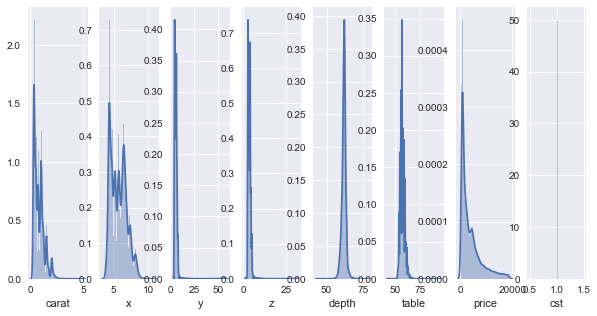

In [79]:
# check numerical feature's distributions

fig, ax = plt.subplots(1, len(numerical_features), figsize=(10,5))
for idx, feature in enumerate(numerical_features):
    sns.distplot(df[feature], ax=ax[idx])
fig.show()

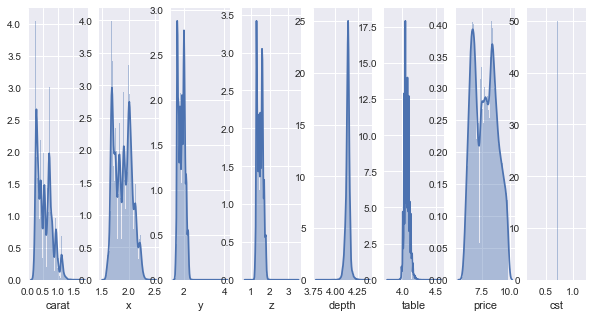

In [80]:
# apply log(y + 1) to normalize their distributions

df[numerical_features] = df[numerical_features].apply(lambda x: np.log1p(x))

fig, ax = plt.subplots(1, len(numerical_features), figsize=(10,5))
for idx, feature in enumerate(numerical_features):
    sns.distplot(df[feature], ax=ax[idx])
fig.show()

In [81]:
# resulting dataframe

print(df.shape)
df.head(10)

(70090, 25)


,carat,x,y,z,depth,table,price,cst,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.963174,2.143589,2.149434,1.738710,4.144721,4.025352,9.259321,0.693147,0,1,...,0,1,0,0,0,0,0,1,0,0
0,0.963174,2.143589,2.149434,1.738710,4.144721,4.025352,9.259321,0.693147,0,1,...,0,0,0,0,0,0,1,0,0,0
0,0.438255,1.834180,1.838961,1.444563,4.135167,4.043051,7.705713,0.693147,0,1,...,0,1,0,0,0,0,0,1,0,0
0,0.438255,1.834180,1.838961,1.444563,4.135167,4.043051,7.705713,0.693147,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.262364,1.684545,1.677097,1.272566,4.091006,4.110874,6.354370,0.693147,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.262364,1.684545,1.677097,1.272566,4.091006,4.110874,6.354370,0.693147,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.792993,2.041220,2.036012,1.669592,4.182050,4.043051,8.525558,0.693147,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.792993,2.041220,2.036012,1.669592,4.182050,4.043051,8.525558,0.693147,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.862890,2.113843,2.106570,1.671473,4.104295,4.060443,9.363061,0.693147,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.862890,2.113843,2.106570,1.671473,4.104295,4.060443,9.363061,0.693147,0,0,...,0,0,0,0,1,0,0,0,0,0


In [82]:
# split data

X_train = df.drop('price', axis=1).values[:ntrain]
y_train = df['price'].values[:ntrain]
X_test = df.drop('price', axis=1).values[ntrain:]
y_test = df['price'].values[ntrain:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45849, 24), (45849,), (24241, 24), (24241,))

# SGDRegressor

In [102]:
from sklearn.linear_model import SGDRegressor

model_sgd = SGDRegressor()
model_sgd.fit(X_train, y_train)

rmse = mean_squared_error(np.expm1(model_sgd.predict(X_test)), np.expm1(y_test))**0.5
print('SGDRegressor RMSE: %0.2f' % rmse)

SGDRegressor RMSE: 2724.94


In [103]:
np.expm1(model_sgd.predict(X_test))

array([ 10232.71564363,    673.41090977,   1245.17011535, ...,
         1419.33439968,   3129.15058663,   3260.57584916])

In [104]:
np.expm1(y_test)

array([ 9483.,   769.,  1241., ...,  1144.,  3389.,  3630.])

# Linear gd

In [86]:
lr = 0.001

In [87]:
def linear_gd():
    iterations = 10000
    w = np.zeros(X_train.shape[1])

    loss_train = []
    loss_test = []
    
    start = time.time()
    for i in range(iterations):
        y_pred_train = np.dot(X_train, w)
        error_train = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))**0.5
        loss_train.append(error_train)

        y_pred_test = np.dot(X_test, w)
        error_test = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test))**0.5
        loss_test.append(error_test)

        grad_cost = 2*np.dot(np.transpose(X_train), y_pred_train - y_train)/X_train.shape[0]

        w = w - lr * grad_cost

        if (i%50 == 0):
            print('iteration: {}, error_test: {}'.format(i, error_test))
            
    end = time.time()
    print('time elapsed: {}'.format(end - start))
    return loss_train, loss_test

In [61]:
loss_train, loss_test = linear_gd()

iteration: 0, error_test: 5609.126490452116
iteration: 50, error_test: 3960.133019659207
iteration: 100, error_test: 3838.4411530517546
iteration: 150, error_test: 3814.5197530298597
iteration: 200, error_test: 3791.6133609542226
iteration: 250, error_test: 3768.7846035150937
iteration: 300, error_test: 3746.0247342556154
iteration: 350, error_test: 3723.3341547275486
iteration: 400, error_test: 3700.713555822081
iteration: 450, error_test: 3678.163813118448
iteration: 500, error_test: 3655.685968125477
iteration: 550, error_test: 3633.2812119698797
iteration: 600, error_test: 3610.950870568404
iteration: 650, error_test: 3588.696391130161
iteration: 700, error_test: 3566.5193298583954
iteration: 750, error_test: 3544.4213407346665
iteration: 800, error_test: 3522.4041652806104
iteration: 850, error_test: 3500.4696232031542
iteration: 900, error_test: 3478.6196038386565
iteration: 950, error_test: 3456.8560583200297
iteration: 1000, error_test: 3435.1809923984756
iteration: 1050, error

iteration: 8650, error_test: 1966.7782954012848
iteration: 8700, error_test: 1968.2239969593554
iteration: 8750, error_test: 1969.7315331020295
iteration: 8800, error_test: 1971.2991245959588
iteration: 8850, error_test: 1972.9250171978863
iteration: 8900, error_test: 1974.60748191246
iteration: 8950, error_test: 1976.3448152176657
iteration: 9000, error_test: 1978.135339258924
iteration: 9050, error_test: 1979.9774020129387
iteration: 9100, error_test: 1981.8693774223311
iteration: 9150, error_test: 1983.8096655021618
iteration: 9200, error_test: 1985.7966924194031
iteration: 9250, error_test: 1987.8289105464369
iteration: 9300, error_test: 1989.904798489651
iteration: 9350, error_test: 1992.0228610941895
iteration: 9400, error_test: 1994.1816294259215
iteration: 9450, error_test: 1996.3796607316556
iteration: 9500, error_test: 1998.615538378642
iteration: 9550, error_test: 2000.8878717743505
iteration: 9600, error_test: 2003.1952962675593
iteration: 9650, error_test: 2005.53647303168

In [64]:
print('GD Min RMSE: %0.2f' % min(loss_test))

GD Min RMSE: 1953.49


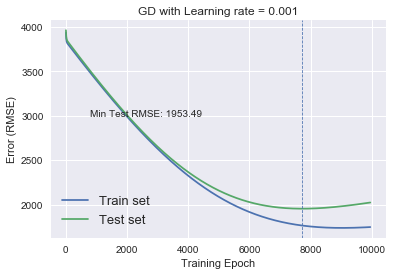

In [88]:
line1, = plt.plot(loss_train[50:])
line2, = plt.plot(loss_test[50:])
plt.axvline(x=np.argmin(np.array(loss_test[50:])), ls='--', linewidth='0.8')
plt.legend((line1, line2), ('Train set', 'Test set'), fontsize=13)
plt.text(800, 3000, 'Min Test RMSE: %0.2f' % min(loss_test))
plt.title('GD with Learning rate = {}'.format(lr))
plt.ylabel('Error (RMSE)')
plt.xlabel('Training Epoch')
plt.show()

# Normal Equation

In [89]:
w = np.dot(np.linalg.pinv(X_train), y_train)
y_pred_test = np.dot(X_test, w)
rmse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test))**0.5

In [90]:
print('Normal Equation RMSE: %0.2f' % rmse)

Normal Equation RMSE: 1287.52
